### The Spark Foundation
#### GRIPJULY21

### Name: Raj Gaurav
### Data Science & Business Analytics Intern
#### Task-2: Prediction Using Unsupervised ML
#### Description Of Task: Predict The Optimum Number of Clusters and Represent it Visually
#### Dataset: https://bit.ly/3kXTdox

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Loading IRIS Dataset

In [2]:
iris = datasets.load_iris() # Loading dataset from sklearn library

# Converting dataset into data frame

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names) 

print('Iris Dataset\n',iris_df.head(),'\n') # See the first 5 rows
print('Target Names\n',iris.target_names)

Iris Dataset
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

Target Names
 ['setosa' 'versicolor' 'virginica']


### Description of Dataset

In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for Null and Categorical Data

In [4]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

No Null value in IRIS Dataset

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


No categorical valuses.

### Extracting from Dataset

In [6]:
x =iris_df.iloc[:,[0,1, 2, 3]].values  # Selecting columns from dataset

### Finding the Optimal Number of Clusters Using the Elbow Method

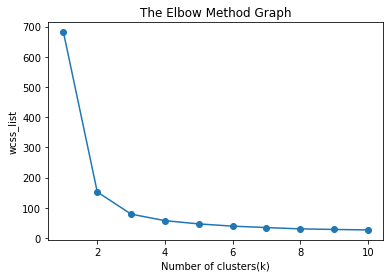

In [7]:
# Finding optimal number of cluster using the elbow method

from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS(Within Cluster Sum of Squares)

# Using for loop for iterations from 1 to 10

for i in range(1,11):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

# Plotting Elbow plot to see clusters
plt.plot(range(1,11), wcss_list, marker='o')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

#### From the above plot, we can see the elbow point is at 3. So the number of clusters here will be 3

### Training the K-means algorithm on the training dataset
As we have got the number of clusters, so we can now train the model on the dataset.
we will use 3, as we know there are 3 clusters that need to be formed. The code is given below:

In [8]:
kmeans = KMeans (n_clusters=3, init='k-means++', random_state=0)
y_predict = kmeans.fit_predict(x)

The first line is the same as above for creating the object of KMeans class.

In the second line of code, we have created the dependent variable y_predict to train the model.

By executing the above lines of code, we will get the y_predict variable.

### Visualizing the Clusters

In below lines of code, we have written code for each clusters, ranging from 1 to 3. The first coordinate of the plt.scatter,
i.e., x[y_predict == 0, 0] containing the x value for the showing the matrix of features values, and the y_predict is ranging from 0 to 1.

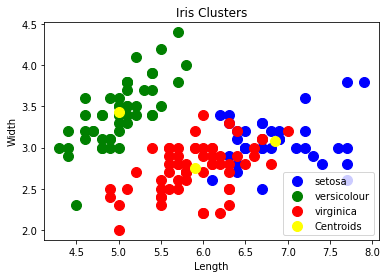

In [9]:
plt.scatter(x[y_predict == 0,0],x[y_predict == 0,1], 
            s=100, c= 'blue', label= 'setosa')
plt.scatter(x[y_predict == 1,0],x[y_predict == 1,1], 
            s=100, c= 'green', label= 'versicolour')
plt.scatter(x[y_predict == 2,0],x[y_predict == 2,1], 
            s=100, c= 'red', label= 'virginica')

# Plotting the centroids of the clusters
plt.scatter (kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s=100, c='yellow', label='Centroids')

plt.title('Iris Clusters')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

The output image is clearly showing the three different clusters with different colors.